# compute drawdowns

In [87]:
import pandas as pd
me = pd.read_csv(U"C:/Users/18862/Lab/Portfolios_Formed_on_ME_Wout_Div.CSV",
                 header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me[['Lo 10','Hi 10']]
rets.columns=['SmallCap','LargeCap']
rets.head()

,SmallCap,LargeCap
192607,-0.12,3.51
192608,1.23,3.40
192609,0.53,0.71
192610,-4.42,-2.75
192611,-3.30,1.70


In [88]:
rets = rets/100
rets

,SmallCap,LargeCap
192607,-0.0012,0.0351
192608,0.0123,0.0340
192609,0.0053,0.0071
192610,-0.0442,-0.0275
192611,-0.0330,0.0170
...,...,...
201908,-0.0573,-0.0180
201909,0.0237,0.0156
201910,-0.0187,0.0269
201911,0.0306,0.0355


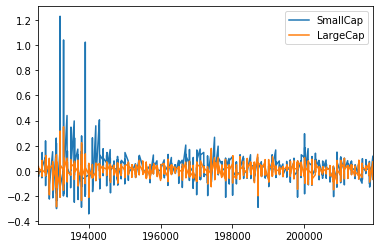

In [89]:
rets.plot.line()

In [90]:
rets.head()

,SmallCap,LargeCap
192607,-0.0012,0.0351
192608,0.0123,0.0340
192609,0.0053,0.0071
192610,-0.0442,-0.0275
192611,-0.0330,0.0170


In [91]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910,
            201911, 201912],
           dtype='int64', length=1122)

In [92]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=1122, freq=None)

In [93]:
rets.index = rets.index.to_period('M') #convert the point time to a period
rets.head()

,SmallCap,LargeCap
1926-07,-0.0012,0.0351
1926-08,0.0123,0.0340
1926-09,0.0053,0.0071
1926-10,-0.0442,-0.0275
1926-11,-0.0330,0.0170


In [94]:
rets["1975"]

,SmallCap,LargeCap
1975-01,0.2670,0.1062
1975-02,0.0418,0.0633
1975-03,0.0803,0.0179
1975-04,0.0294,0.0464
1975-05,0.0775,0.0474
1975-06,0.0717,0.0408
1975-07,0.0060,-0.0709
1975-08,-0.0612,-0.0228
1975-09,-0.0360,-0.0384
1975-10,0.0054,0.0651


In [95]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', length=1122, freq='M')

In [96]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1122 entries, 1926-07 to 2019-12
Freq: M
Data columns (total 2 columns):
SmallCap    1122 non-null float64
LargeCap    1122 non-null float64
dtypes: float64(2)
memory usage: 26.3 KB


# compute DRAWDOWNS

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as as a percentage of previous peaks


In [97]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

In [98]:
wealth_index

1926-07      1035.100000
1926-08      1070.293400
1926-09      1077.892483
1926-10      1048.250440
1926-11      1066.070697
               ...      
2019-08    145330.526871
2019-09    147597.683091
2019-10    151568.060766
2019-11    156948.726923
2019-12    161468.850258
Freq: M, Name: LargeCap, Length: 1122, dtype: float64

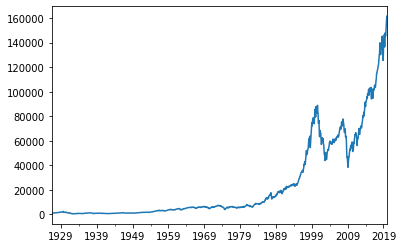

In [99]:
wealth_index.plot()

In [100]:
previous_peaks = wealth_index.cummax()

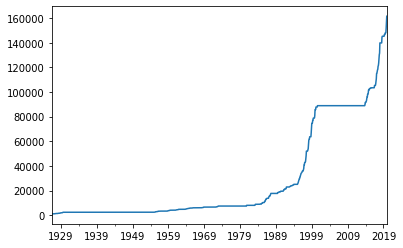

In [101]:
previous_peaks.plot()

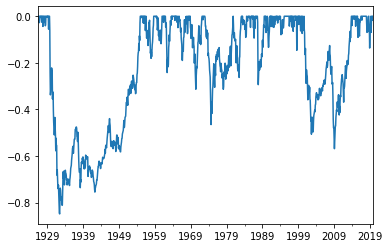

In [102]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [103]:
drawdown.head()

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.027500
1926-11   -0.010968
Freq: M, Name: LargeCap, dtype: float64

In [104]:
drawdown.min()

-0.8483946450757985

In [106]:
drawdown["1975":].min() #since we get the time series, we are able to use the time 

-0.5684864589374016

In [107]:
drawdown["1975":].idxmin() #idxmin can be used to see the index (time in other words) that has the minimum number(largest drawdown)

Period('2009-02', 'M')

In [108]:
drawdown.idxmin()

Period('1932-06', 'M')

#since we have the largecap drawdowns, we want to calculte the Smallcap in a SIMPLE WAY
#create a function where I can give it a series. What it will do for me is compute all these various things
#like the drawdown, and the previous peak, and the wealth index 
#so that I can plot them and I can do whatever I want.

In [121]:
def drawdown(returns_series: pd.Series):
    """
    Takes a time series returns
    Computes and returns a data frame that comtains:
    wealth index
    previous peaks 
    percent drawdowns
    """
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "wealth": wealth_index,
        "peaks" : previous_peaks,
        "drawdowns" : drawdowns
    })

In [122]:
drawdown(rets["LargeCap"]).head()

,wealth,peaks,drawdowns
1926-07,1035.100000,1035.100000,0.000000
1926-08,1070.293400,1070.293400,0.000000
1926-09,1077.892483,1077.892483,0.000000
1926-10,1048.250440,1077.892483,-0.027500
1926-11,1066.070697,1077.892483,-0.010968


In [123]:
drawdown(rets["LargeCap"])[["wealth","peaks"]].head()

,wealth,peaks
1926-07,1035.100000,1035.100000
1926-08,1070.293400,1070.293400
1926-09,1077.892483,1077.892483
1926-10,1048.250440,1077.892483
1926-11,1066.070697,1077.892483


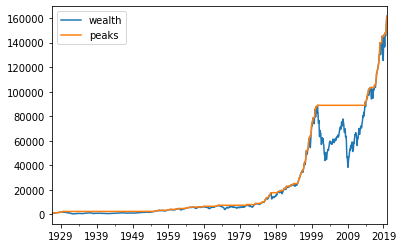

In [124]:
drawdown(rets["LargeCap"])[["wealth","peaks"]].plot()

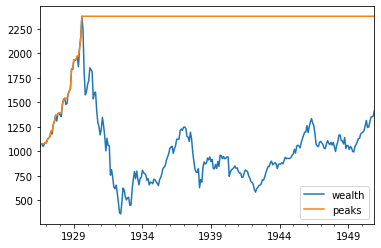

In [125]:
drawdown(rets[:"1950"]["LargeCap"])[["wealth","peaks"]].plot()

In [126]:
drawdown(rets["LargeCap"]).head()

,wealth,peaks,drawdowns
1926-07,1035.100000,1035.100000,0.000000
1926-08,1070.293400,1070.293400,0.000000
1926-09,1077.892483,1077.892483,0.000000
1926-10,1048.250440,1077.892483,-0.027500
1926-11,1066.070697,1077.892483,-0.010968


In [135]:
drawdown(rets["LargeCap"])["drawdowns"].min()

-0.8483946450757985

In [136]:
drawdown(rets["SmallCap"])["drawdowns"].min()

-0.8979323034325497

In [137]:
drawdown(rets["SmallCap"])["drawdowns"].idxmin()

Period('1932-05', 'M')

In [138]:
drawdown(rets["LargeCap"])["drawdowns"].idxmin()

Period('1932-06', 'M')

In [139]:
drawdown(rets[:"1945"]["LargeCap"])["drawdowns"].idxmin()

Period('1932-06', 'M')

In [140]:
drawdown(rets[:"1945"]["LargeCap"])["drawdowns"].min()

-0.8483946450757985